# Plots of the measurement points for the Bdot and triple probes

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper')

import sqlite3
import sys
sys.path.append('..')
import read_from_sql.read_from_sql as read_from_sql
import mach_probe_analysis
from write_to_vtk import prepare_measurements as pm

The table below summaries the boundaries of the common space across all planes for each probe type.
The inner boundary is the boundary at which values and gradiuents should be interpolated correctly.
The outer boundary should be used for cutting off which data is feed to the interpolator to ensure a convex space.

|   | x_min  | x_max | y_min  | y_max |
|---|---|---|---|---|
|B_inner   |-0.026m|0.024m|-0.02m |0.028m|
|B_outer   |-0.032m|0.028m|-0.022m|0.032m|
|tp_inner  |-0.022m|0.024m|-0.026m|0.024m|
|tp_outer  |-0.026m|0.028m|-0.03m |0.028m|


|   | x_min  | x_max | y_min  | y_max |
|---|---|---|---|---|
|joint_inner|-0.022m|0.024m|-0.02m|0.024m|
|joint_outer|-0.026m|0.028m|-0.024m|0.028m|


|   | x_min  | x_max | y_min  | y_max |
|---|---|---|---|---|
|joint_z0416_mach_inner   |-0.048m|0.048m|-0.018m |0.028m|
|joint_z0416_mach_outer   |-0.05m|0.05m|-0.022m|0.032m|
|mach_z_inner  |-0.03m|0.03m|-0.02m|0.03m|
|mach_z_outer  |-0.032m|0.032m|-0.022m |0.032m|


In the z=0.249m plane

|   | x_min  | x_max | y_min  | y_max |
|---|---|---|---|---|
|b_x_inner  | -0.048m|0.048m|-0.018m |0.028m|
|b_y_inner  |-0.032m|0.032m|-0.022m|0.032m|
|b_z_inner  |-0.03m|0.03m|-0.02m|0.03m|


all planes

|   | x_min  | x_max | y_min  | y_max |
|---|---|---|---|---|
|b_x_outer_249  |-0.032m|0.025m|-0.06m  |0.041m|
|b_x_outer_302  |-0.027m|0.027m|-0.076m |0.041m|
|b_x_outer_357  |-0.064m|0.042m|-0.021m |0.028m|
|b_x_outer_416  |-0.061m|0.042m|-0.026m |0.03m|
|b_y_outer_249  |-0.032m|0.025m|-0.057m |0.034m|
|b_y_outer_302  |-0.027m|0.027m|-0.073m |0.044m|
|b_y_outer_357  |-0.047m|0.031m|-0.021m |0.03m|
|b_y_outer_416  |-0.072m|0.031m|-0.026m |0.03m|
|b_z_outer_249  |-0.027m|0.025m|-0.06m  |0.041m|
|b_z_outer_302  |-0.027m|0.027m|-0.076m |0.041m|
|b_z_outer_357  |-0.044m|0.031m|-0.021m |0.03m|
|b_z_outer_416  |-0.072m|0.031m|-0.026m |0.03m|

|   | x_min  | x_max | y_min  | y_max |
|---|---|---|---|---|
|bx_by_outer_249 |-0.032m|0.025m|-0.057m |0.034m|
|bx_by_outer_302 |-0.027m|0.027m|-0.073m |0.041m|
|bx_by_outer_357 |-0.047m|0.031m|-0.021m |0.028m|
|bx_by_outer_416 |-0.061m|0.031m|-0.026m |0.03m|


In [3]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

In [4]:
import structured_3d_vtk as struc_3d

In [5]:
bx_measurements = pm.read_idl('bx', 
                              data_path='../../output/comprehensive_3d_plot/2016-08-12/')
by_measurements = pm.read_idl('by', 
                              data_path='../../output/comprehensive_3d_plot/2016-08-12/')
bz_measurements = pm.read_idl('bz',
                              data_path='../../output/comprehensive_3d_plot/2016-08-12/')

for plane in [0.249, 0.302, 0.357, 0.416]:
    bx_measurements[plane] = pm.average_duplicate_points(bx_measurements[plane])
    by_measurements[plane] = pm.average_duplicate_points(by_measurements[plane])
    bz_measurements[plane] = pm.average_duplicate_points(bz_measurements[plane])

direction_measurements = [bx_measurements, by_measurements, bz_measurements] 

In [6]:
te_measurements = pm.read_idl('te',
                              data_path='../../output/comprehensive_3d_plot/2016-08-12/')

for plane in [0.249, 0.302, 0.357, 0.416]:
    te_measurements[plane] = pm.average_duplicate_points(te_measurements[plane])

In [7]:
timesteps = 250

database = '../shots_database/shots.db'
table = 'Shots'
z_direction_1, z_direction_2 = 0, 180
y_direction_1, y_direction_2 = 90, 270
angle_signs = {0: 1,
               180: -1,
               90: -1,
               0: 1}
min_spectral_density = 1.6e-8

condition_z_0416 = ("campaigns = 'mach_probe_plane_campaign_1'"
                    " AND fiducial_pre_crowbar_gyration_spectral_density > "
                    + str(min_spectral_density) +
                    " AND mach_signals_exist = 1"
                    " AND (mach_orientation = " + str(z_direction_1) +
                    " OR mach_orientation = " + str(z_direction_2) + ")")

condition_y_0416 = ("campaigns = 'mach_probe_plane_campaign_1'"
                    " AND fiducial_pre_crowbar_gyration_spectral_density > "
                    + str(min_spectral_density) +
                    " AND mach_signals_exist = 1"
                    " AND (mach_orientation = " + str(y_direction_1) +
                    " OR mach_orientation = " + str(y_direction_2) + ")")

cursor, connection = read_from_sql.cursor_with_rows(condition_z_0416,
                                                    database,
                                                    table)
z_0416_shots = cursor.fetchall()
cursor.close()
connection.close()

cursor, connection = read_from_sql.cursor_with_rows(condition_y_0416,
                                                    database,
                                                    table)
y_0416_shots = cursor.fetchall()
cursor.close()
connection.close()

condition_z_302 = ("campaigns = 'mach_probe_plane_campaign_2'"
                   " AND fiducial_pre_crowbar_gyration_spectral_density > "
                   + str(min_spectral_density) +
                   " AND mach_signals_exist = 1"
                   " AND (mach_orientation = " + str(z_direction_1) +
                   " OR mach_orientation = " + str(z_direction_2) + ")")

cursor, connection = read_from_sql.cursor_with_rows(condition_z_302,
                                                    database,
                                                    table)
z_0302_shots = cursor.fetchall()
cursor.close()
connection.close()

mach_z_z0416_x = []
mach_z_z0416_y = []
mach_z_z0302_x = []
mach_z_z0302_y = []
mach_y_z0416_x = []
mach_y_z0416_y = []
for shot in z_0416_shots:
    mach_z_z0416_x.append(shot['mach_x'])
    mach_z_z0416_y.append(shot['mach_y'])
for shot in z_0302_shots:
    mach_z_z0302_x.append(shot['mach_x'])
    mach_z_z0302_y.append(shot['mach_y'])
for shot in y_0416_shots:
    mach_y_z0416_x.append(shot['mach_x'])
    mach_y_z0416_y.append(shot['mach_y']) 

# How many points are there total?

In [8]:
(bx_measurements[0.249]['x_out'].size + 
 bx_measurements[0.302]['x_out'].size + 
 bx_measurements[0.357]['x_out'].size +
 bx_measurements[0.416]['x_out'].size +
 by_measurements[0.249]['x_out'].size + 
 by_measurements[0.302]['x_out'].size + 
 by_measurements[0.357]['x_out'].size +
 by_measurements[0.416]['x_out'].size +
 bz_measurements[0.249]['x_out'].size + 
 bz_measurements[0.302]['x_out'].size + 
 bz_measurements[0.357]['x_out'].size +
 bz_measurements[0.416]['x_out'].size +
 te_measurements[0.249]['x_out'].size +
 te_measurements[0.302]['x_out'].size + 
 te_measurements[0.357]['x_out'].size + 
 te_measurements[0.416]['x_out'].size +
 len(mach_z_z0416_x) +
 len(mach_y_z0416_x))

10195

In [9]:
len(mach_z_z0416_x)

246

# All quanities

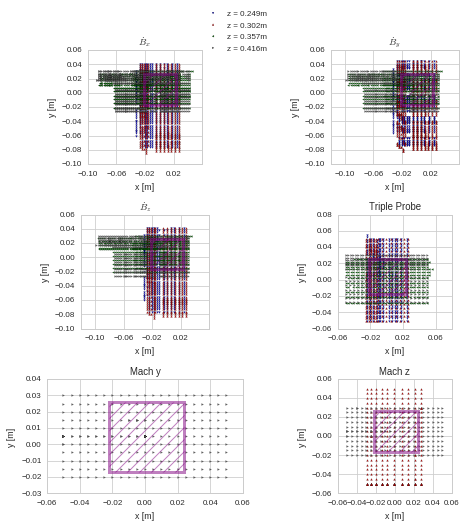

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(7.5, 7), dpi=600)
size = 3

joint_space = [patches.Rectangle((-0.022, -0.017), 
                                 0.024+0.022, 
                                 0.026+0.017,
                                 fill=False, 
                                 hatch='//', 
                                 alpha=0.5, 
                                 edgecolor='purple',
                                 linewidth=3) for i in range(6)]

### B_x
###
axes[0, 0].scatter(direction_measurements[0][0.249]['x_out'],
                   direction_measurements[0][0.249]['y_out'], 
                   marker='v', label='z = 0.249m', s=size)
axes[0, 0].scatter(direction_measurements[0][0.302]['x_out'],
                   direction_measurements[0][0.302]['y_out'], 
                   c='r', marker='^', label='z = 0.302m', s=size)
axes[0, 0].scatter(direction_measurements[0][0.357]['x_out'],
                   direction_measurements[0][0.357]['y_out'], 
                   c='g', marker='<', label='z = 0.357m', s=size)
axes[0, 0].scatter(direction_measurements[0][0.416]['x_out'],
                   direction_measurements[0][0.416]['y_out'], 
                   c='grey', marker='>', label='z = 0.416m', s=size)
axes[0, 0].set_xlabel('x [m]')
axes[0, 0].set_ylabel('y [m]')
#axes[0, 0].legend(loc='best')
axes[0, 0].xaxis.set_ticks(np.arange(-0.1, 0.06, 0.04))
#axes[0, 0].yticks(np.arange(-0.1, 0.06, 0.01)) 
#minorLocator = MultipleLocator(0.02)
#axes[0, 0].xaxis.set_minor_locator(minorLocator)
#axes[0, 0].yaxis.set_minor_locator(minorLocator)
axes[0,0].grid(b=True, which='minor', color='grey', alpha=0.3)
axes[0, 0].set_aspect('equal')
axes[0, 0].add_patch(joint_space[0])
axes[0, 0].set_title(r'$\dot{B}_x$')
lgd = axes[0, 0].legend(bbox_to_anchor=[1.3,1.4], 
                        loc='upper center', 
                        borderaxespad=0.25)

### B_y
###
axes[0, 1].scatter(direction_measurements[1][0.249]['x_out'],
                   direction_measurements[1][0.249]['y_out'], 
                   marker='v', label='z = 0.249m', s=size)
axes[0, 1].scatter(direction_measurements[1][0.302]['x_out'],
                   direction_measurements[1][0.302]['y_out'], 
                   c='r', marker='^', label='z = 0.302m', s=size)
axes[0, 1].scatter(direction_measurements[1][0.357]['x_out'],
                   direction_measurements[1][0.357]['y_out'], 
                   c='g', marker='<', label='z = 0.357m', s=size)
axes[0, 1].scatter(direction_measurements[1][0.416]['x_out'],
            direction_measurements[1][0.416]['y_out'], 
            c='grey', marker='>', label='z = 0.416m', s=size)
axes[0, 1].set_xlabel('x [m]')
axes[0, 1].set_ylabel('y [m]')
#plt.legend()
axes[0, 1].xaxis.set_ticks(np.arange(-0.1, 0.06, 0.04))
#plt.yticks(np.arange(-0.1, 0.06, 0.04))
#minorLocator = MultipleLocator(0.002)
#axes.xaxis.set_minor_locator(minorLocator)
#axes.yaxis.set_minor_locator(minorLocator)
#plt.xlim((-0.1,0.06))
#plt.grid(b=True, which='minor', color='grey', alpha=0.3)
axes[0, 1].set_aspect('equal')
axes[0, 1].add_patch(joint_space[1])
axes[0, 1].set_title(r'$\dot{B}_y$')


### B_z
###
axes[1, 0].scatter(direction_measurements[2][0.249]['x_out'],
                   direction_measurements[2][0.249]['y_out'], 
                   marker='v', label='z = 0.249m', s=size)
axes[1, 0].scatter(direction_measurements[2][0.302]['x_out'],
                   direction_measurements[2][0.302]['y_out'], 
                   c='r', marker='^', label='z = 0.302m', s=size)
axes[1, 0].scatter(direction_measurements[2][0.357]['x_out'],
                   direction_measurements[2][0.357]['y_out'], 
                   c='g', marker='<', label='z = 0.357m', s=size)
axes[1, 0].scatter(direction_measurements[2][0.416]['x_out'],
                   direction_measurements[2][0.416]['y_out'], 
                   c='grey', marker='>', label='z = 0.416m', s=size)
axes[1, 0].set_xlabel('x [m]')
axes[1, 0].set_ylabel('y [m]')
#plt.legend()
axes[1, 0].xaxis.set_ticks(np.arange(-0.1, 0.06, 0.04))
#plt.yticks(np.arange(-0.1, 0.06, 0.01))
#axes = plt.gca()
#minorLocator = MultipleLocator(0.002)
#axes.xaxis.set_minor_locator(minorLocator)
#axes.yaxis.set_minor_locator(minorLocator)
#plt.xlim((-0.1,0.06))
#plt.grid(b=True, which='minor', color='grey', alpha=0.3)
#plt.show()
axes[1, 0].set_aspect('equal')
axes[1, 0].add_patch(joint_space[2])
axes[1, 0].set_title(r'$\dot{B}_z$')

### Triple
###
axes[1, 1].scatter(te_measurements[0.249]['x_out'],
                   te_measurements[0.249]['y_out'], 
                   marker='v', label='z = 0.249m plane', s=size)
axes[1, 1].scatter(te_measurements[0.302]['x_out'],
                   te_measurements[0.302]['y_out'], 
                   c='r', marker='^', label='z = 0.302m plane', s=size)
axes[1, 1].scatter(te_measurements[0.357]['x_out'],
                   te_measurements[0.357]['y_out'], 
                   c='g', marker='<', label='z = 0.357m plane', s=size)
axes[1, 1].scatter(te_measurements[0.416]['x_out'],
                   te_measurements[0.416]['y_out'], 
                   c='grey', marker='>', label='z = 0.416m plane', s=size)
axes[1, 1].set_xlabel('x [m]')
axes[1, 1].set_ylabel('y [m]')
#plt.legnd()
axes[1, 1].xaxis.set_ticks(np.arange(-0.06, 0.08, 0.04))
#plt.yticks(np.arange(-0.06, 0.08, 0.01))
#axes = plt.gca()
#minorLocator = MultipleLocator(0.002)
#axes.xaxis.set_minor_locator(minorLocator)
#axes.yaxis.set_minor_locator(minorLocator)
#plt.grid(b=True, which='minor', color='grey', alpha=0.3)
axes[1, 1].set_aspect('equal')
axes[1, 1].add_patch(joint_space[3])
axes[1, 1].set_title(r'Triple Probe')

### Mach_y
###
axes[2, 0].scatter(mach_y_z0416_x,
                   mach_y_z0416_y, 
                   c='grey', marker='>', label='z = 0.416m plane', s=size)
axes[2, 0].set_xlabel('x [m]')
axes[2, 0].set_ylabel('y [m]')
#.legend()
#plt.xticks(np.arange(-0.06, 0.08, 0.01))
#plt.yticks(np.arange(-0.06, 0.08, 0.01))
#axes = plt.gca()
#minorLocator = MultipleLocator(0.002)
#axes.xaxis.set_minor_locator(minorLocator)
#axes.yaxis.set_minor_locator(minorLocator)
#plt.grid(b=True, which='minor', color='grey', alpha=0.3)
#plt.show()
axes[2, 0].set_aspect('equal')
axes[2, 0].add_patch(joint_space[4])
axes[2, 0].set_title(r"Mach y")

### Mach_z
###
axes[2, 1].scatter(mach_z_z0302_x,
                   mach_z_z0302_y, 
                   c='r', marker='^', label='z = 0.302m plane', s=size)
axes[2, 1].scatter(mach_z_z0416_x,
                   mach_z_z0416_y, 
                   c='grey', marker='>', label='z = 0.416m plane', s=size)
axes[2, 1].set_xlabel('x [m]')
axes[2, 1].set_ylabel('y [m]')
#plt.legend()
#plt.xticks(np.arange(-0.06, 0.08, 0.01))
#plt.yticks(np.arange(-0.06, 0.08, 0.01))
#axes = plt.gca()
#minorLocator = MultipleLocator(0.002)
#axes.xaxis.set_minor_locator(minorLocator)
#axes.yaxis.set_minor_locator(minorLocator)
#plt.grid(b=True, which='minor', color='grey', alpha=0.3)
#plt.show()
axes[2, 1].set_aspect('equal')
axes[2, 1].add_patch(joint_space[5])
axes[2, 1].set_title(r'Mach z')

plt.tight_layout()

fig.savefig('measurement_space.png', dpi=600, 
            bbox_extra_artists=(lgd,), bbox_inches='tight')

# $B_y$

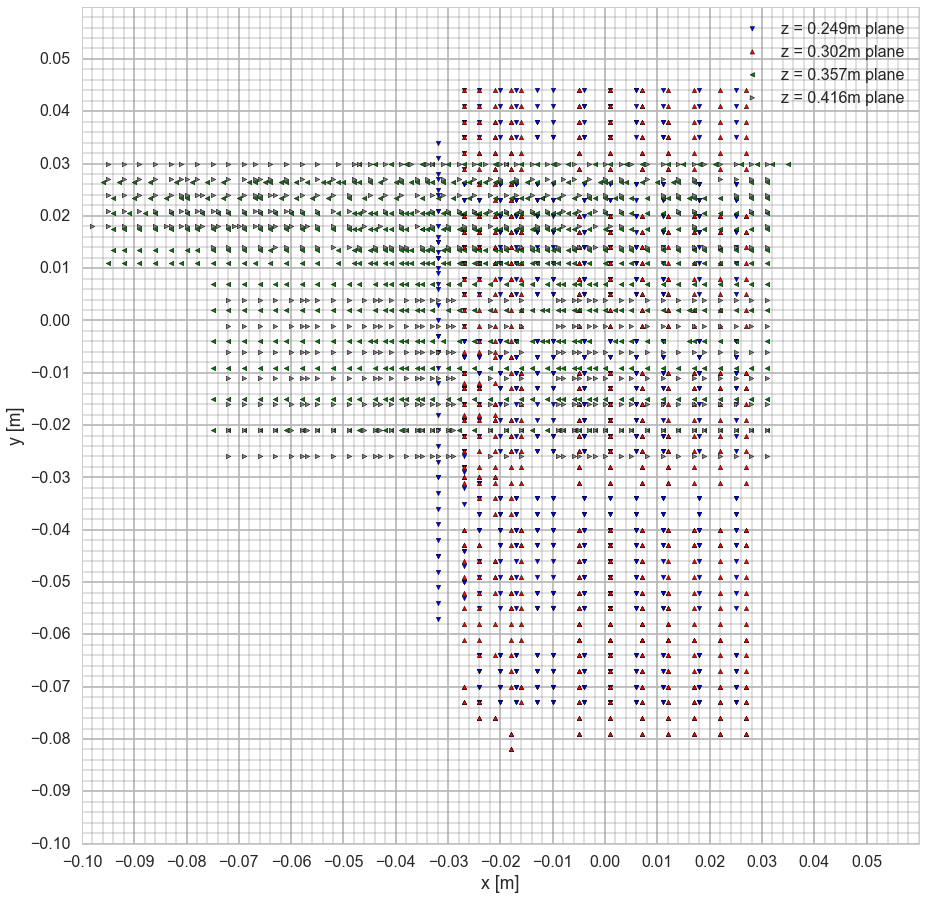

In [51]:
fig = plt.figure(figsize=(15,15))
plt.scatter(direction_measurements[1][0.249]['x_out'],
            direction_measurements[1][0.249]['y_out'], marker='v', label='z = 0.249m plane')
plt.scatter(direction_measurements[1][0.302]['x_out'],
            direction_measurements[1][0.302]['y_out'], c='r', marker='^', label='z = 0.302m plane')
plt.scatter(direction_measurements[1][0.357]['x_out'],
            direction_measurements[1][0.357]['y_out'], c='g', marker='<', label='z = 0.357m plane')
plt.scatter(direction_measurements[1][0.416]['x_out'],
            direction_measurements[1][0.416]['y_out'], c='grey', marker='>', label='z = 0.416m plane')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.xticks(np.arange(-0.1, 0.06, 0.01))
plt.yticks(np.arange(-0.1, 0.06, 0.01))
axes = plt.gca()
minorLocator = MultipleLocator(0.002)
axes.xaxis.set_minor_locator(minorLocator)
axes.yaxis.set_minor_locator(minorLocator)
plt.xlim((-0.1,0.06))
plt.grid(b=True, which='minor', color='grey', alpha=0.3)
plt.show()

# $B_z$

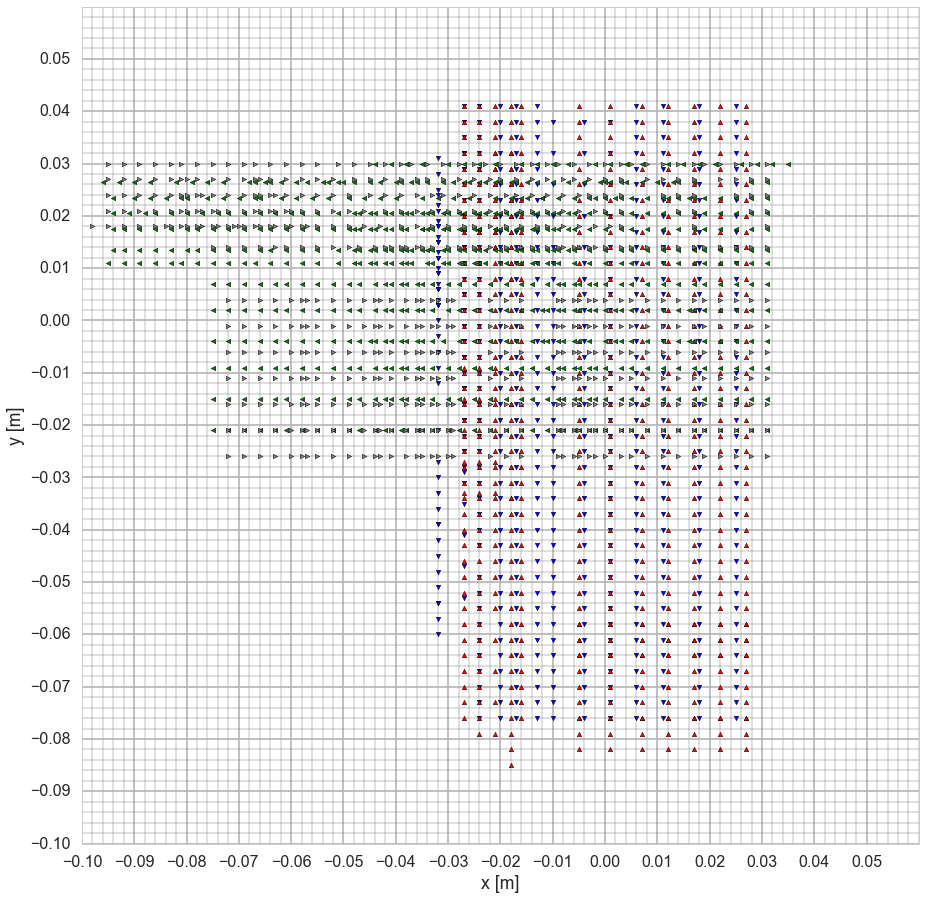

In [48]:
fig = plt.figure(figsize=(15,15))
plt.scatter(direction_measurements[2][0.249]['x_out'],
            direction_measurements[2][0.249]['y_out'], marker='v', label='z = 0.249m plane')
plt.scatter(direction_measurements[2][0.302]['x_out'],
            direction_measurements[2][0.302]['y_out'], c='r', marker='^', label='z = 0.302m plane')
plt.scatter(direction_measurements[2][0.357]['x_out'],
            direction_measurements[2][0.357]['y_out'], c='g', marker='<', label='z = 0.357m plane')
plt.scatter(direction_measurements[2][0.416]['x_out'],
            direction_measurements[2][0.416]['y_out'], c='grey', marker='>', label='z = 0.416m plane')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.xticks(np.arange(-0.1, 0.06, 0.01))
plt.yticks(np.arange(-0.1, 0.06, 0.01))
axes = plt.gca()
minorLocator = MultipleLocator(0.002)
axes.xaxis.set_minor_locator(minorLocator)
axes.yaxis.set_minor_locator(minorLocator)
plt.xlim((-0.1,0.06))
plt.grid(b=True, which='minor', color='grey', alpha=0.3)
plt.show()

# Triple Probe ($n$, $T_e$)

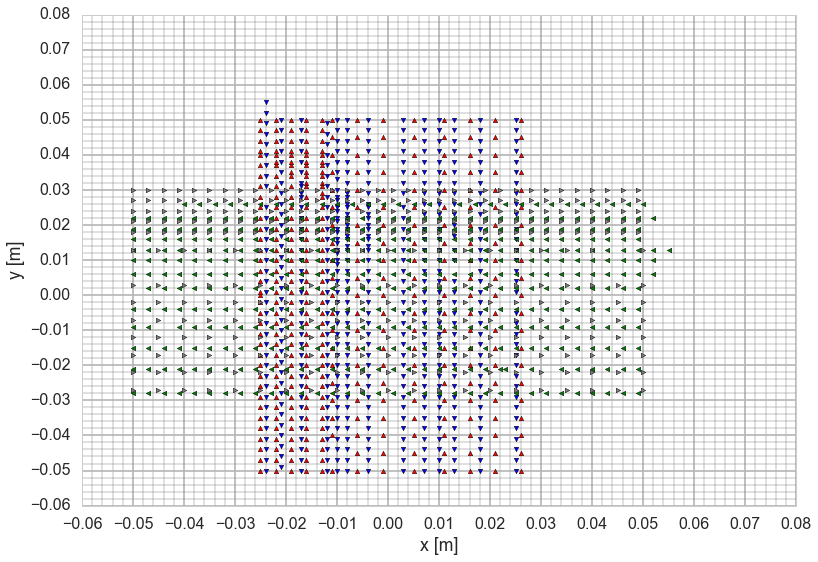

In [44]:
te_measurements = struc_3d.read_idl('te')

for plane in [0.249, 0.302, 0.357, 0.416]:
    te_measurements[plane] = struc_3d.average_duplicate_points(te_measurements[plane])

plt.scatter(te_measurements[0.249]['x_out'],
            te_measurements[0.249]['y_out'], marker='v', label='z = 0.249m plane')
plt.scatter(te_measurements[0.302]['x_out'],
            te_measurements[0.302]['y_out'], c='r', marker='^', label='z = 0.302m plane')
plt.scatter(te_measurements[0.357]['x_out'],
            te_measurements[0.357]['y_out'], c='g', marker='<', label='z = 0.357m plane')
plt.scatter(te_measurements[0.416]['x_out'],
            te_measurements[0.416]['y_out'], c='grey', marker='>', label='z = 0.416m plane')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.xticks(np.arange(-0.06, 0.08, 0.01))
plt.yticks(np.arange(-0.06, 0.08, 0.01))
axes = plt.gca()
minorLocator = MultipleLocator(0.002)
axes.xaxis.set_minor_locator(minorLocator)
axes.yaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='minor', color='grey', alpha=0.3)
plt.show()

# Plot Mach points

In [11]:
timesteps = 250

database = '/Users/vonderlinden2/rsx_analysis/shots_database/source/shots.db'
table = 'Shots'
z_direction_1, z_direction_2 = 0, 180
y_direction_1, y_direction_2 = 90, 270
angle_signs = {0: 1,
               180: -1,
               90: -1,
               0: 1}
min_spectral_density = 1.6e-8

condition_z_0416 = ("campaigns = 'mach_probe_plane_campaign_1'"
                    " AND fiducial_pre_crowbar_gyration_spectral_density > "
                    + str(min_spectral_density) +
                    " AND mach_signals_exist = 1"
                    " AND (mach_orientation = " + str(z_direction_1) +
                    " OR mach_orientation = " + str(z_direction_2) + ")")

condition_y_0416 = ("campaigns = 'mach_probe_plane_campaign_1'"
                    " AND fiducial_pre_crowbar_gyration_spectral_density > "
                    + str(min_spectral_density) +
                    " AND mach_signals_exist = 1"
                    " AND (mach_orientation = " + str(y_direction_1) +
                    " OR mach_orientation = " + str(y_direction_2) + ")")

cursor, connection = read_from_sql.cursor_with_rows(condition_z_0416,
                                                    database,
                                                    table)
z_0416_shots = cursor.fetchall()
cursor.close()
connection.close()

cursor, connection = read_from_sql.cursor_with_rows(condition_y_0416,
                                                    database,
                                                    table)
y_0416_shots = cursor.fetchall()
cursor.close()
connection.close()

condition_z_302 = ("campaigns = 'mach_probe_plane_campaign_2'"
                   " AND fiducial_pre_crowbar_gyration_spectral_density > "
                   + str(min_spectral_density) +
                   " AND mach_signals_exist = 1"
                   " AND (mach_orientation = " + str(z_direction_1) +
                   " OR mach_orientation = " + str(z_direction_2) + ")")

cursor, connection = read_from_sql.cursor_with_rows(condition_z_302,
                                                    database,
                                                    table)
z_0302_shots = cursor.fetchall()
cursor.close()
connection.close()

mach_z_z0416_x = []
mach_z_z0416_y = []
mach_z_z0302_x = []
mach_z_z0302_y = []
mach_y_z0416_x = []
mach_y_z0416_y = []
for shot in z_0416_shots:
    mach_z_z0416_x.append(shot['mach_x'])
    mach_z_z0416_y.append(shot['mach_y'])
for shot in z_0302_shots:
    mach_z_z0302_x.append(shot['mach_x'])
    mach_z_z0302_y.append(shot['mach_y'])
for shot in y_0416_shots:
    mach_y_z0416_x.append(shot['mach_x'])
    mach_y_z0416_y.append(shot['mach_y'])    

# $M_z$

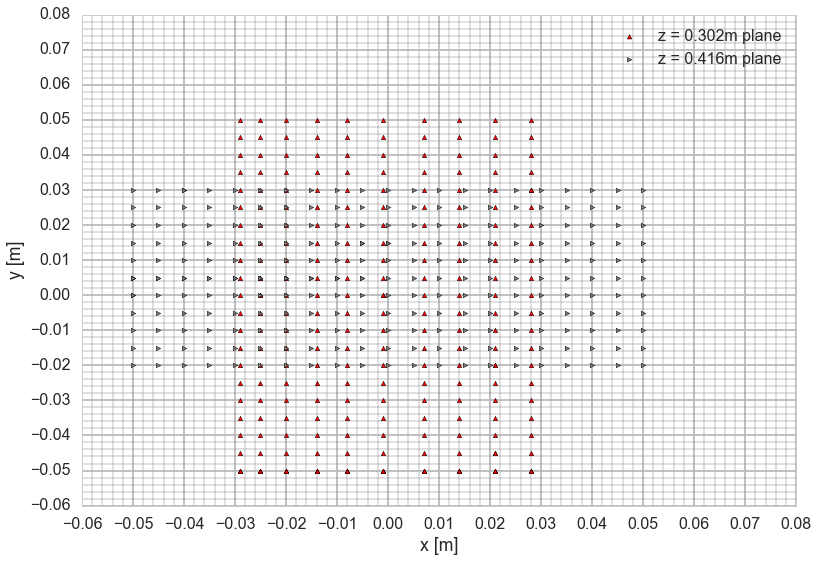

In [22]:
plt.scatter(mach_z_z0302_x,
            mach_z_z0302_y, c='r', marker='^', label='z = 0.302m plane')
plt.scatter(mach_z_z0416_x,
            mach_z_z0416_y, c='grey', marker='>', label='z = 0.416m plane')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.xticks(np.arange(-0.06, 0.08, 0.01))
plt.yticks(np.arange(-0.06, 0.08, 0.01))
axes = plt.gca()
minorLocator = MultipleLocator(0.002)
axes.xaxis.set_minor_locator(minorLocator)
axes.yaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='minor', color='grey', alpha=0.3)
plt.show()

# $M_y$

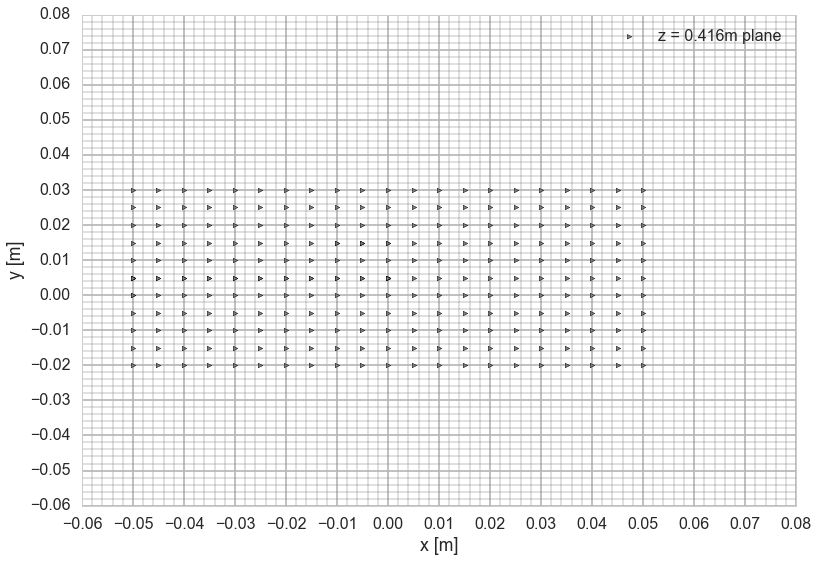

In [23]:
plt.scatter(mach_y_z0416_x,
            mach_y_z0416_y, c='grey', marker='>', label='z = 0.416m plane')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.xticks(np.arange(-0.06, 0.08, 0.01))
plt.yticks(np.arange(-0.06, 0.08, 0.01))
axes = plt.gca()
minorLocator = MultipleLocator(0.002)
axes.xaxis.set_minor_locator(minorLocator)
axes.yaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='minor', color='grey', alpha=0.3)
plt.show()

# Understand why measurement space has to be cut short